----------------------------------------


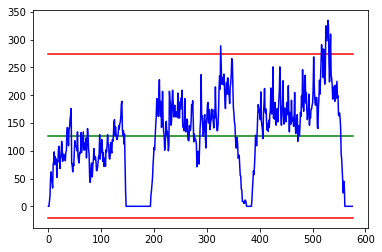

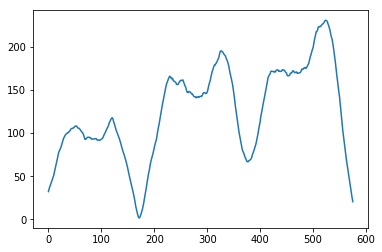

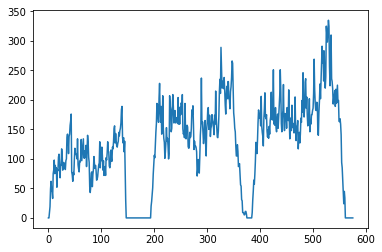

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from pandas.plotting import parallel_coordinates
from scipy.spatial import distance

#################################################### 第1题 ####################################################
db_filename = 'dinofunworld-2.db'
conn =sqlite3.connect(db_filename)
c = conn.cursor()
cursor = c.execute("select  sequence  from sequences ")

distances= {};
index = 0;
##对数据进行整理, 把字符转成数字
for row in cursor:
    sequenceArray = row[0].split("-");
    distances[index] =  list(map(int,sequenceArray)) ; 
    index =  index +1;
print("----------------------------------------");

##初始化时间序列数据的一维数据, 每个元素初始为0, 表示某个时间点针对设备ID=8的访问数量
timeValues  =[0 for _ in range(len(distances[0]))]
for row in distances:
    toBeCalculatedValues = distances[row]
    for visitNumber in range(len(toBeCalculatedValues)):
        count = 0;
        if toBeCalculatedValues[visitNumber] == 8:
            count = count + 1;
            timeValues[visitNumber] = timeValues[visitNumber] + 1

##print("Final timeValues ->", timeValues);
mean = np.nanmean(timeValues)
std = np.nanstd(timeValues)

## 平均线
plt.plot([0,len(timeValues)],[mean , mean],'g-')
## 标准差
plt.plot([0,len(timeValues)],[mean+ 2*std, mean + 2*std],'r-')
plt.plot([0,len(timeValues)],[mean- 2*std, mean - 2*std],'r-')
## 设备ID=8的访问量
plt.plot(range(len(timeValues)), timeValues, 'b-')

plt.show()

#################################################### 第2题 ####################################################
window_size = 50
plt.plot(np.convolve(timeValues, np.ones(window_size,)/window_size, 'same'))
plt.show()

#################################################### 第3题 ####################################################
span = 50
df = pd.DataFrame({'timeValues': timeValues})
df_exp = df.ewm(span -50).mean()
plt.plot(df_exp)
plt.show()
